###TWITCH

Twitch is the world’s leading video platform and community for gamers, with 15+ million unique daily visitors. Using data to understand its users and products is one of the chief responsibilities of the Twitch Science Team.

In this project, you will be working with two training tables that contain Twitch users’ stream (video) viewing data and chat room usage data.

Stream viewing data:

stream table
Chat usage data:

chat table
The Twitch Science Team provided this practice dataset. You can download the .csv files (800,000 rows) from GitHub.

In [45]:
import pandas as pd
import requests


In [46]:
url = 'https://github.com/Codecademy/datasets/blob/master/twitch/chat.csv'
x = requests.get(url=url, certs=certs).content
chat = pd.read_csv(io.StringIO(x.decode('utf8')))

NameError: name 'certs' is not defined

The next part of this will be SQLite.
1. Start by getting a feel for the stream table and the chat table:

Select all columns from the first 20 rows.

What columns do the tables have?

In [ ]:
# select * from stream limit 20;
# select * from chat limit 20;

#### CHAT
---
<table>
    <thead>
        <tr>
            <th colspan="2">chat</th>
        </tr>
        <tr>
            <td>Name</td><td>Type</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>time</td><td>DATETIME</td>
        </tr>
        <tr>
            <td>device_id</td><td>TEXT<td></td>
        </tr>
        <tr>
            <td>login</td><td>TEXT</td>
        </tr>
        <tr>
            <td>channel</td><td>TEXT</td>
        </tr>
        <tr>
            <td>country</td><td>TEXT</td>
        </tr>
        <tr>
            <td>player</td><td>TEXT</td>
        </tr>
        <tr>
            <td>game</td><td>TEXT</td>
        </tr>
        <tr>
            <td>name</td><td>TEXT</td>
        </tr>
    </tbody>
</table>

#### STREAM
---
time	DATETIME
device_id	TEXT
login	TEXT
channel	TEXT
country	TEXT
player	TEXT
game	TEXT
stream_format	TEXT
subscriber	TEXT

2. What are the unique games in the stream table?

In [ ]:
# select distinct game from stream;

3. What are the unique channels in the stream table?

In [ ]:
# select distinct channel from stream;

4. What are the most popular games in the stream table?

Create a list of games and their number of viewers using GROUP BY.

In [ ]:
# select game, count(*) 
# from stream 
# group by game 
# order by count(*) desc;

5. These are some big numbers from the game League of Legends (also known as LoL).

Where are these LoL stream viewers located?

Create a list of countries and their number of LoL viewers using WHERE and GROUP BY.

In [ ]:
# select country, count(*) from stream 
# where game="League of Legends"
# group by country
# order by 2 desc;

6. The player column contains the source the user is using to view the stream (site, iphone, android, etc).

Create a list of players and their number of streamers.

In [ ]:
# select player, count(*) as num_streamers 
# from stream group by player order by 2 desc;

7. Create a new column named genre for each of the games.

Group the games into their genres: Multiplayer Online Battle Arena (MOBA), First Person Shooter (FPS), Survival, and Other.

Using CASE, your logic should be:

If League of Legends → MOBA
If Dota 2 → MOBA
If Heroes of the Strom → MOBA
If Counter-Strike: Global Offensive → FPS
If DayZ → Survival
If Survival Evolved → Survival
Else → Other
Use GROUP BY and ORDER BY to showcase only the unique game titles.

In [ ]:
# with genres as
# (select game,
#   case
#     when game in ("League of Legends", "Dota 2", "Heroes of the Strom") 
#       then "MOBA"
#     when game in ("Counter-Stroke: Global Offensive")
#       then "FBS"
#     when game in ("DayZ", "Survival Evolved")
#       then "Survival"
#     else "Other"
#   end as "genre"
# from stream)
# -- select game, genre from genres;
# select distinct genre, game, count(*)
# from genres
# group by genre, game
# order by genre, game;

###How does view count change in the course of a day?

10. Okay, now we understand how strftime() works. Let’s write a query that returns three columns:

The hours of the time column
The view count for each hour
Lastly, filter the result with only the users in your country using a WHERE clause

In [ ]:
# select time, 
#   strftime('%H', time) as "hours",
#   strftime('%M', time) as 'Minutes',
#   strftime('%S', time) as "seconds"
#   from stream
#   where country == "US"
#   limit 20;

12. 
The stream table and the chat table share a column: device_id.

Let’s join the two tables on that column.

In [ ]:
# select * from stream
# join chat
# on stream.device_id = chat.device_id
# limit 20;

#PART 2 Visualize Data with Matplotlib

1. Make a bar chart of games and the number of viewers playing them.

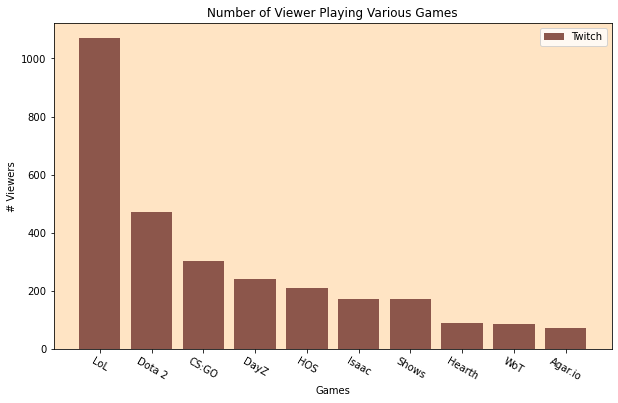

In [47]:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Bar Graph: Featured Games

games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]

viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

# Pie Chart: League of Legends Viewers' Whereabouts

labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]

countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

# Line Graph: Time Series Analysis

hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

fig, ax = plt.subplots(figsize=(10,6))
xpos = list(range(len(games)))
plt.bar(xpos, viewers, label='Twitch', color='tab:brown')
ax.set_xticks(xpos)
ax.set_xticklabels(games, rotation=-30)
ax.set_facecolor('bisque')
plt.title('Number of Viewer Playing Various Games')
plt.xlabel('Games')
plt.ylabel('# Viewers')
plt.legend()
plt.show()



2. Pie chart of LOL players in various countries 

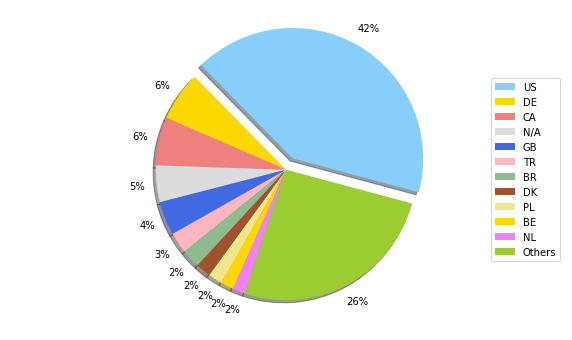

In [48]:
# Pie Chart: League of Legends Viewers' Whereabouts
labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", \
          "NL", "Others"]
countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', \
          'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', \
          'yellowgreen']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(10,6))

plt.axis('equal')
plt.pie(countries, 
        colors=colors, \
       explode=explode, shadow=True, startangle=345, \
       autopct='%1.0f%%', pctdistance=1.15)
plt.legend(labels, loc='right')
plt.show()




9. Make line graph of US viewers at different hours of the day on January 1st, 2015.

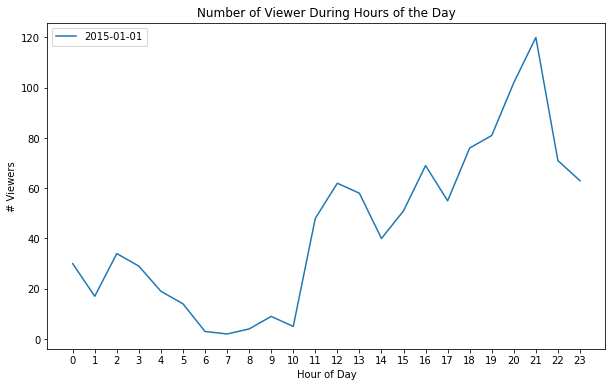

In [49]:
# Line Graph: Time Series Analysis

hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, \
                48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

hours = list(hour)

fig, ax = plt.subplots(figsize=(10,6))
# plt.plot(hours, viewers_hour, label='2015/01/01')
plt.plot(hours, viewers_hour)
plt.title('Number of Viewer During Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('# Viewers')
plt.legend(['2015-01-01'],loc=2)
ax.set_xticks(hours)
plt.show()


11. There is some uncertainty in these numbers because some people leave their browsers open. Let’s account for a 15% error in the viewers_hour data.

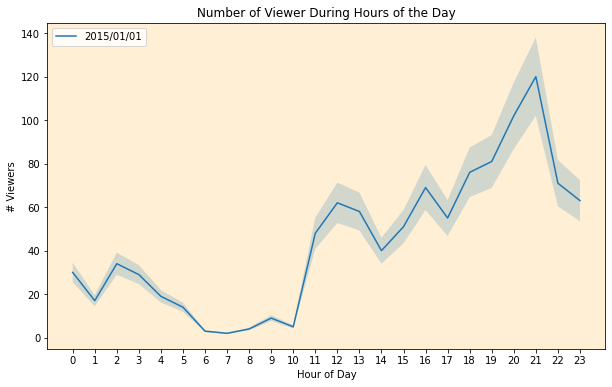

In [50]:
# Create lines for upper and lower error 
error = 0.15
y_lower = [(1.-error)*x for x in viewers_hour]
y_upper = [(1.+error)*x for x in viewers_hour]

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(list(hour), viewers_hour)
plt.fill_between(hours, y_lower, y_upper, alpha=.2)
plt.title('Number of Viewer During Hours of the Day')
ax.set_facecolor('papayawhip')
plt.xlabel('Hour of Day')
plt.ylabel('# Viewers')
plt.legend(['2015/01/01'], loc=2)
ax.set_xticks(hour)
plt.show()